In [1]:
import pandas as pd
import networkx as nx
import numpy as np
from viz import NetworkView
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import community
pd.set_option('display.max_rows', 50)

# Reading data

In [2]:
data = pd.read_pickle("../datasets/rep_eov.pkl")
data[['document ID', 'organization', 'concept']].to_numpy()
data

,statement ID,time,document ID,document title,author,source,type,text,person,organization,concept,agreement,category
20,5524,2010-05-07 12:00:00,3,E_1.03_CDU_1_w,"Bellmann, Veronika",1_07.05.2010,EoV_individual/yes-but,Schaden vom deutschen Volk abwenden,"Bellmann, Veronika",CDU,Representation_Citizens_German,1,Politics
27,496,2010-05-07 12:00:00,3,E_1.03_CDU_1_w,"Bellmann, Veronika",1_07.05.2010,EoV_individual/yes-but,Der deutsche Steuerzahler bürgt damit bzw. re...,"Bellmann, Veronika",CDU,Representation_Taxpayers_German,1,Politics
58,527,2010-05-07 12:00:00,4,E_1.04_SPD_1_w,"Binding, Lothar",1_07.05.2010,EoV_individual/confirm,die Finanztransaktionsteuer belaste die kleine...,"Binding, Lothar",SPD,Representation_Savers,1,Politics
96,5537,2010-05-07 12:00:00,4,E_1.04_SPD_1_w,"Binding, Lothar",1_07.05.2010,EoV_individual/confirm,Wie kann ich mit gutem Gewissen einem Gesetz z...,"Binding, Lothar",SPD,Representation_Conscience,1,Politics
97,553,2010-05-07 12:00:00,4,E_1.04_SPD_1_w,"Binding, Lothar",1_07.05.2010,EoV_individual/confirm,für den deutschen Steuerzahler,"Binding, Lothar",SPD,Representation_Taxpayers_German,1,Politics
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5485,4961,2015-08-19 12:00:00,432,E_5.25_Grüne_1_w,"Rößner, Tabea",5_19.08.2015,EoV_individual/yes-but,"Die teilweise Erhöhung der Mehrwehrsteuer, vo...","Rößner, Tabea",Greens,Representation_Socially deprived_Greek,1,Politics
5501,4972,2015-08-19 12:00:00,432,E_5.25_Grüne_1_w,"Rößner, Tabea",5_19.08.2015,EoV_individual/yes-but,Und ich sehe meine Verantwortung gegenüber de...,"Rößner, Tabea",Greens,Representation_Citizens_German,1,Politics
5502,4973,2015-08-19 12:00:00,432,E_5.25_Grüne_1_w,"Rößner, Tabea",5_19.08.2015,EoV_individual/yes-but,Und ich sehe meine Verantwortung gegenüber de...,"Rößner, Tabea",Greens,Representation_Citizens_Greek,1,Politics
5516,4986,2015-08-19 12:00:00,434,E_5.27_CDU_1_w,"Schimke, Jana",5_19.08.2015,EoV_individual/defect,"Dies würde dazu führen, dass die Menschen un...","Schimke, Jana",CDU,Representation_Taxpayers,1,Politics


# Generating frequent itemsets

In [3]:
def generate_transaction(data):
    data_dict = {}
    data_array = data[['document ID', 'organization', 'concept']].to_numpy()
    
    for doc_id, party, concept in data_array:
        if data_dict.get(doc_id, None):
            data_dict[doc_id].append(concept)
        else:
            data_dict[doc_id] = [concept]
    
    transactions = []
    
    for k, val in data_dict.items():
        transactions.append(val)
        
    return transactions
        
transactions = generate_transaction(data)
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
print(len(df.columns))
df_items = pd.DataFrame(list(df.columns))
print(df_items)
frequent_itemsets = apriori(df, min_support=0.025, use_colnames=False) # Changing support threshold

frequent_itemsets
frequent_itemsets.sort_values(by=['support'], ascending=False)

48
                                             0
0                    Representation_Businesses
1             Representation_Businesses_German
2              Representation_Businesses_Greek
3                      Representation_Children
4               Representation_Children_German
5                Representation_Children_Greek
6             Representation_Citizens_European
7               Representation_Citizens_German
8                Representation_Citizens_Greek
9              Representation_Citizens_Italian
10          Representation_Citizens_Portuguese
11             Representation_Citizens_Spanish
12                   Representation_Conscience
13                 Representation_Constituents
14                 Representation_East Germany
15                    Representation_Employees
16             Representation_Employees_German
17              Representation_Employees_Greek
18               Representation_Families_Greek
19           Representation_Future generations
20  Repres

,support,itemsets
2,0.447154,(8)
11,0.292683,(38)
1,0.252033,(7)
13,0.178862,(45)
10,0.178862,(37)
8,0.154472,(35)
26,0.130081,"(8, 38)"
34,0.121951,"(37, 38)"
25,0.105691,"(8, 37)"
24,0.105691,"(8, 35)"


In [4]:
# Picking top itemsets (based on support)
frequent_itemsets_50 = frequent_itemsets.head(50) # Changing number of top rows
frequent_itemsets_50

,support,itemsets
0,0.065041,(6)
1,0.252033,(7)
2,0.447154,(8)
3,0.048780,(12)
4,0.073171,(17)
5,0.105691,(23)
6,0.048780,(29)
7,0.040650,(31)
8,0.154472,(35)
9,0.040650,(36)


# Finding association rules

In [5]:
d = association_rules(frequent_itemsets_50, metric="lift", min_threshold=1.2)
d

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(6),(7),0.065041,0.252033,0.040650,0.625000,2.479839,0.024258,1.994580
1,(7),(6),0.252033,0.065041,0.040650,0.161290,2.479839,0.024258,1.114759
2,(23),(7),0.105691,0.252033,0.065041,0.615385,2.441687,0.038403,1.944715
3,(7),(23),0.252033,0.105691,0.065041,0.258065,2.441687,0.038403,1.205373
4,(36),(7),0.040650,0.252033,0.032520,0.800000,3.174194,0.022275,3.739837
5,(7),(36),0.252033,0.040650,0.032520,0.129032,3.174194,0.022275,1.101475
6,(8),(35),0.447154,0.154472,0.105691,0.236364,1.530144,0.036618,1.107240
7,(35),(8),0.154472,0.447154,0.105691,0.684211,1.530144,0.036618,1.750678
8,(8),(37),0.447154,0.178862,0.105691,0.236364,1.321488,0.025712,1.075300
9,(37),(8),0.178862,0.447154,0.105691,0.590909,1.321488,0.025712,1.351400


In [6]:
# Sorting rules by lift value
d.sort_values(by=['lift'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,(17),(29),0.073171,0.048780,0.048780,0.666667,13.666667,0.045211,2.853659
13,(29),(17),0.048780,0.073171,0.048780,1.000000,13.666667,0.045211,inf
17,(41),(17),0.048780,0.073171,0.032520,0.666667,9.111111,0.028951,2.780488
16,(17),(41),0.073171,0.048780,0.032520,0.444444,9.111111,0.028951,1.712195
19,(47),(17),0.097561,0.073171,0.032520,0.333333,4.555556,0.025382,1.390244
18,(17),(47),0.073171,0.097561,0.032520,0.444444,4.555556,0.025382,1.624390
14,(17),(35),0.073171,0.154472,0.040650,0.555556,3.596491,0.029348,1.902439
15,(35),(17),0.154472,0.073171,0.040650,0.263158,3.596491,0.029348,1.257840
36,(35),"(8, 47)",0.154472,0.065041,0.032520,0.210526,3.236842,0.022473,1.184282
33,"(8, 47)",(35),0.065041,0.154472,0.032520,0.500000,3.236842,0.022473,1.691057


# Generating adjacency matrix

(48, 48)


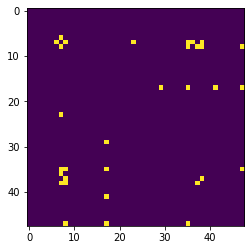

In [7]:
def association_to_graph_from_df(d_ass_rules, no_of_nodes):
        
    # Selecting columns
    d_ass_rules = d_ass_rules[['antecedents', 'consequents']]
    
    net = np.zeros((no_of_nodes, no_of_nodes))
    print(net.shape)
        
    for index, row in d.iterrows():
        ant = tuple(row.antecedents)
        con = tuple(row.consequents)
        
        for i in ant:
            for j in con:
                net[i, j] += 1
         
    return net

net = association_to_graph_from_df(d, 48) #Changing number of nodes
plt.imshow(net > 0)

# Drawing network graph

Cluster avg.: 0.29444444444444445
Density: 0.24242424242424243


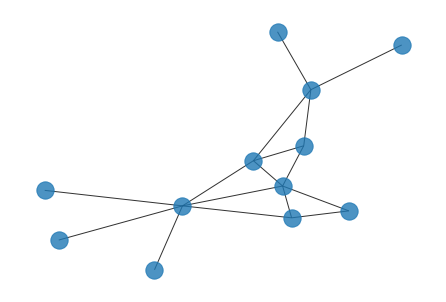

In [8]:
G = NetworkView.gen_simple_graph(net)
G.remove_nodes_from(list(nx.isolates(G)))
pos = nx.spring_layout(G)
nx.draw(G, pos, alpha=.8, )

# Computing global clustering coefficient
g_cluster = nx.average_clustering(G)
print(f'Cluster avg.: {g_cluster}')

# Computing density
density = nx.density(G)
print(f'Density: {density}')